Reading in the street center line shapefile from the Chicago data portal. Removed the two null rows. 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://data.cityofchicago.org/api/geospatial/6imu-meau?method=export&format=Shapefile"
g1 = gpd.read_file(url1)
#g1 = gpd.read_file("Downloads/497_Data/Streets/street_center.shp")
#g1[g1['geometry'].isnull()]
g1 = g1[pd.notnull(g1['geometry'])]
g1.head()

,class,date_creat,time_creat,create_use,dir_travel,edit_date,edit_type,ewns,ewns_coord,ewns_dir,...,t_cross,t_cross_st,t_zlev,tiered,tnode_id,trans_id,date_updat,time_updat,update_use,geometry
0,4,1999-01-01,00:00:00.000,EXISTING,F,0.0,None,-232.0,232.0,W,...,6250|S|||,0.0,0.0,N,16581.0,127104.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.63187018233509 41.780809747581...
1,2,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,0.0,0.0,None,...,800|E|74TH|ST|,172.0,0.0,N,34082.0,128895.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.60548932047928 41.762229643527...
2,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-2500.0,2500.0,W,...,2500|W|109TH|ST|,1805.0,0.0,N,22358.0,142645.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.6838184819274 41.6972438444297...
3,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-932.0,932.0,W,...,||DEAD END||,0.0,0.0,N,28881.0,148189.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.64584189298007 41.693398400444...
4,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-11800.0,11800.0,S,...,11799|S|CHURCH|ST|,1214.0,0.0,N,36534.0,139728.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.67053671319235 41.679759274890...


Reading in the Chicago ward shapefiles

In [2]:
url2 = "https://data.cityofchicago.org/api/geospatial/sp34-6z76?method=export&format=Shapefile"
#g2 = gpd.read_file("Downloads/497_Data/Wards/chiwards.shp")
g2 = gpd.read_file(url2)
g2 = g2[pd.notnull(g2['geometry'])]
g2.head()

,shape_area,shape_leng,ward,geometry
0,1.160965e+08,93073.340838,12,POLYGON ((-87.69623470134458 41.85755495238389...
1,1.031436e+08,97901.323833,16,POLYGON ((-87.66288923669032 41.79883809868242...
2,6.558830e+07,82183.694820,15,POLYGON ((-87.69817510963803 41.81729440755995...
3,1.372904e+08,90105.195619,20,POLYGON ((-87.65524133440029 41.80883316182794...
4,4.973346e+07,38122.692826,49,POLYGON ((-87.66420403810295 42.02126158052747...


Doing a spatial join on the two geodataframes. Can reference https://shapely.readthedocs.io/en/stable/manual.html for binary predicates (contains, within, intersects...) 

Consider the difference between 'intersects' and 'within'; 'intersects' returns the lines that intersect the boundaries of the ward, contains excludes the boundaries - the former may lead to double counting, the latter may be incomplete (but maybe this is a desireable simplification). 

In [3]:
g3 = gpd.sjoin(g1, g2, op='intersects')
g3 = g3.loc[(g3['ward']=='19')]
g4 = gpd.sjoin(g1, g2, op='within')
g4 = g4.loc[(g4['ward']=='19')]

Plotting the centerline data of ward 19. 

Within: 

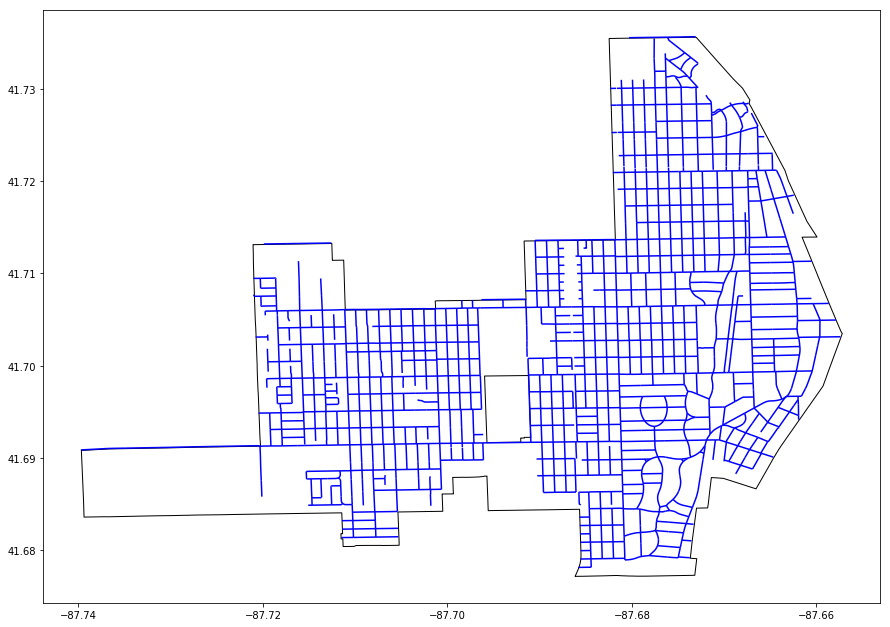

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 25)
ax = g4.plot(ax=ax, color='blue', edgecolor='black')
ward_19 = g2[g2['ward'] == '19'] 
ax = ward_19.plot(ax=ax, color='white', edgecolor='black')
plt.show()

Intersects: 

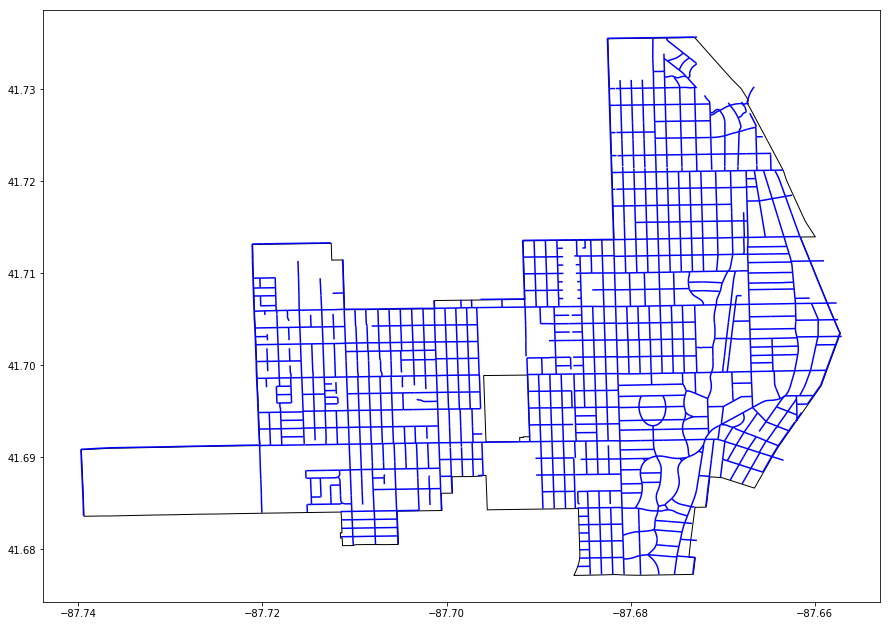

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 25)
ax = g3.plot(ax=ax, color='blue', edgecolor='black')
ward_19 = g2[g2['ward'] == '19'] 
ax = ward_19.plot(ax=ax, color='white', edgecolor='black')
plt.show()

In [6]:
g4

,class,date_creat,time_creat,create_use,dir_travel,edit_date,edit_type,ewns,ewns_coord,ewns_dir,...,tnode_id,trans_id,date_updat,time_updat,update_use,geometry,index_right,shape_area,shape_leng,ward
2,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-2500.0,2500.0,W,...,22358.0,142645.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.6838184819274 41.6972438444297...,41,2.141151e+08,102339.878771,19
30,2,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-10300.0,10300.0,S,...,25885.0,142368.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.68289701751343 41.706377963140...,41,2.141151e+08,102339.878771,19
73,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-2632.0,2632.0,W,...,5223.0,142397.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.6879252195578 41.7108780461457...,41,2.141151e+08,102339.878771,19
74,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-3400.0,3400.0,W,...,22405.0,142905.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.70573855814474 41.691492810155...,41,2.141151e+08,102339.878771,19
122,3,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-11500.0,11500.0,S,...,4771.0,142807.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.68338170809722 41.684507606823...,41,2.141151e+08,102339.878771,19
134,4,1999-01-01,00:00:00.000,EXISTING,B,20100513.0,Attribute Edit,-9100.0,9100.0,S,...,21473.0,139424.0,2010-05-13,00:00:00.000,ds06027,LINESTRING (-87.66917675047367 41.728232518368...,41,2.141151e+08,102339.878771,19
188,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-9700.0,9700.0,S,...,23322.0,138672.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.67347531973081 41.717424394591...,41,2.141151e+08,102339.878771,19
232,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-2100.0,2100.0,W,...,28794.0,139982.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.67455782274469 41.726523468248...,41,2.141151e+08,102339.878771,19
278,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-10200.0,10200.0,S,...,23913.0,140567.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.66467371400034 41.708243285704...,41,2.141151e+08,102339.878771,19
289,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-3500.0,3500.0,W,...,28204.0,142884.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.70847285707696 41.700516283012...,41,2.141151e+08,102339.878771,19


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html
    

In [7]:
df.to_excel("output.xlsx")